In [5]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# open image and return np array 
 
def openIMG(img_path):
    im2 = Image.open(img_path)              
    im2 = np.array(im2) 
    return im2

In [23]:
def shift_image(X, dx, dy):
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = 0
    elif dy<0:
        X[dy:, :] = 0
    if dx>0:
        X[:, :dx] = 0
    elif dx<0:
        X[:, dx:] = 0
    return X

(405, 405)


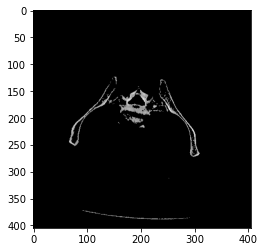

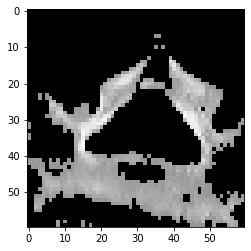

52.0225


In [21]:
thresholded = openIMG('cad_117_threshNoBin.png')
print(thresholded.shape)


plt.imshow(thresholded, cmap = 'gray')
plt.show()

y = 160
x = 135
plt.imshow(thresholded[x:x+60, y:y+60], cmap = 'gray')
plt.show()

print(np.mean(thresholded[x:x+60, y:y+60]))

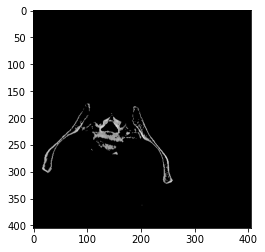

In [51]:
shifted_img = shift_image(thresholded, -50,50)
plt.imshow(shifted_img, cmap = 'gray')
plt.show()

In [52]:
from PIL import Image
im = Image.fromarray(shifted_img)
# This Will Rotate Image By 60 Degree
im = im.rotate(45)
 
im.show()

In [53]:
im.save("z_middle_bottom_rot45.png")

(405, 405)


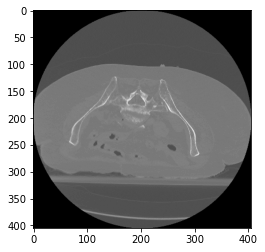

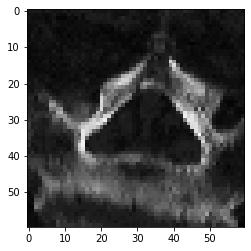

130.0661111111111


In [22]:
grayscale = openIMG('cadaver_slice_117_grey.png')
print(grayscale.shape)

plt.imshow(grayscale, cmap = 'gray')
plt.show()

plt.imshow(grayscale[x:x+60, y:y+60], cmap = 'gray')
plt.show()

print(np.mean(grayscale[x:x+60, y:y+60]))

In [ ]:
# pickle load 
import pickle
with open('parrot.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
# length = len(fit.history['nb_episode_steps'])
length = len(train_num_steps)
fig = plt.figure()
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax.plot(range(length), train_num_steps, color="C0")
ax.set_xlabel("Episodes", color="C0")
ax.set_ylabel("Total Steps", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax2.scatter(range(length), train_episode_reward, color="C1")
ax2.axes.get_xaxis().set_visible(False)
ax2.yaxis.tick_right()
ax2.set_ylabel('Episode Reward', color="C1")
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="C1")
ax.set_title("Traditional Q-Learning Training \n Reward and Steps to Goal vs. Episodes")
fig.savefig(f"GrayScale_Distance_Traditional_Q_learn_training_{length}eps_1_{environment_type}_eps_decay_100")